<a href="https://colab.research.google.com/github/nimishsoni/Transformers---HuggingFace/blob/main/Tokenizer_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import pipeline

In [2]:
# Creating pipeline Object
sentiment_classifier = pipeline('sentiment-analysis')
sentiment_classifier(['I would love to Hate You','I Love You'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.998802661895752},
 {'label': 'POSITIVE', 'score': 0.9998656511306763}]

## # Modeling a sentiment analysis pipeline with individual steps

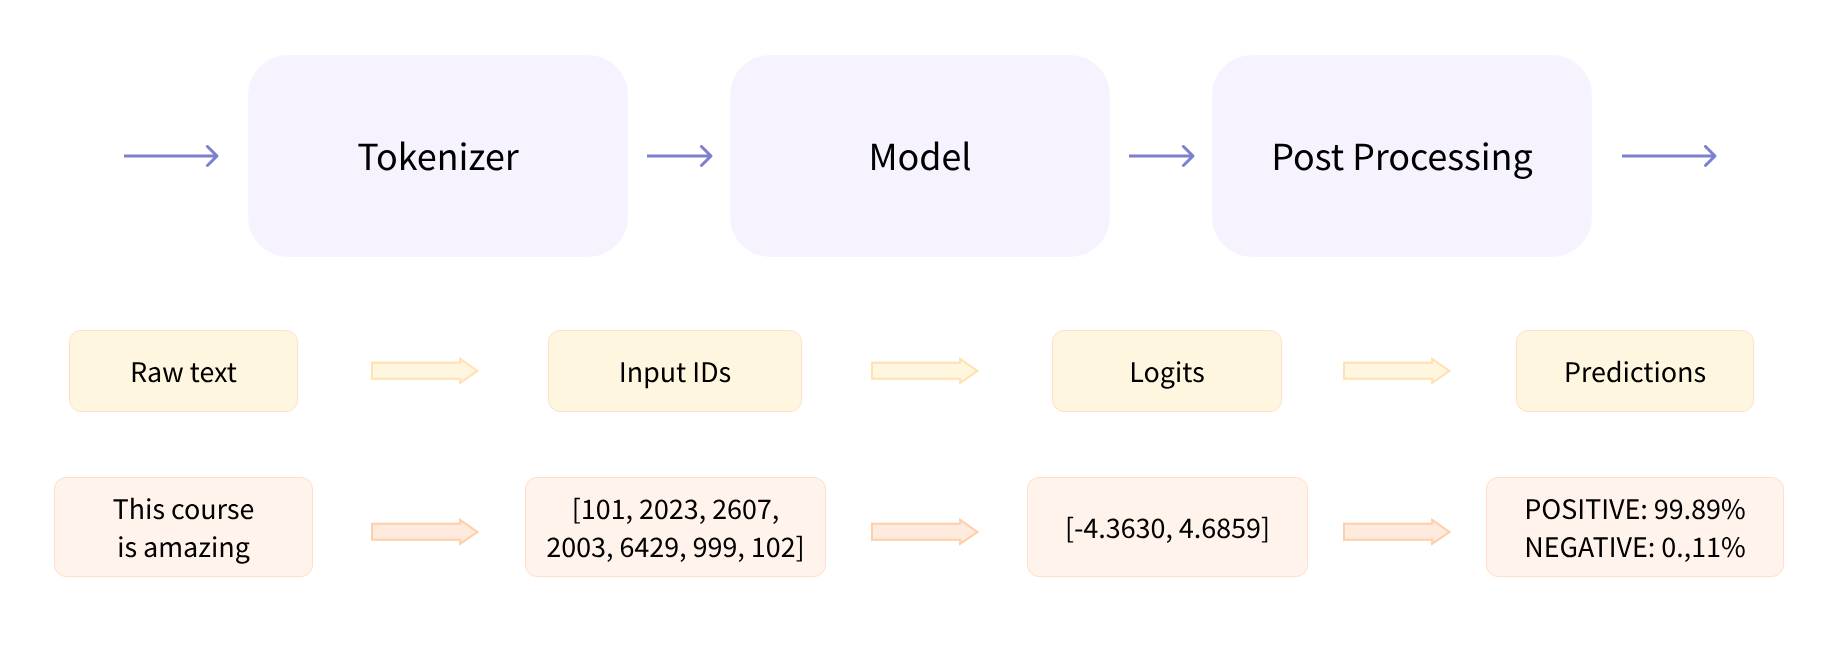

Tokenization Step
- Splitting the input into words, subwords, or symbols (like punctuation) thatb are called tokens
- Mapping each token to an integer
- Adding additional inputs that may be useful to the model

In [3]:
# First step - Tokenize Use tokenization parameters from distilbert
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [4]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [5]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

In [6]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


In [7]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.logits.shape)


torch.Size([2, 2])


In [8]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


 ## Training a new tokenizer

### Import Dataset and create train, test, validation corpus from it

In [9]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00


In [11]:
from datasets import load_dataset

# Raw code dataset loaded in to raw_datasets dictionary and aplit in to train, validation and test daasets
raw_datasets = load_dataset("code_search_net", "python")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/412178 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/22176 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23107 [00:00<?, ? examples/s]

In [12]:
print(raw_datasets["train"], type(raw_datasets))

Dataset({
    features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
    num_rows: 412178
}) <class 'datasets.dataset_dict.DatasetDict'>


In [13]:
print(raw_datasets["train"][123]["func_code_tokens"])

['def', 'export', '(', 'self', ',', 'exports', '=', 'None', ')', ':', 'self', '.', 'exported', '=', 'getattr', '(', 'self', '.', 'precalc', ',', "'exported'", ',', '{', '}', ')', 'if', 'isinstance', '(', 'exports', ',', 'tuple', ')', ':', 'fmts', '=', 'exports', 'elif', 'exports', ':', '# is a string', 'fmts', '=', 'exports', '.', 'split', '(', "','", ')', 'elif', 'isinstance', '(', 'self', '.', 'oqparam', '.', 'exports', ',', 'tuple', ')', ':', 'fmts', '=', 'self', '.', 'oqparam', '.', 'exports', 'else', ':', '# is a string', 'fmts', '=', 'self', '.', 'oqparam', '.', 'exports', '.', 'split', '(', "','", ')', 'keys', '=', 'set', '(', 'self', '.', 'datastore', ')', 'has_hcurves', '=', '(', "'hcurves-stats'", 'in', 'self', '.', 'datastore', 'or', "'hcurves-rlzs'", 'in', 'self', '.', 'datastore', ')', 'if', 'has_hcurves', ':', 'keys', '.', 'add', '(', "'hcurves'", ')', 'for', 'fmt', 'in', 'fmts', ':', 'if', 'not', 'fmt', ':', 'continue', 'for', 'key', 'in', 'sorted', '(', 'keys', ')', ':'

In [14]:
# transform the dataset into batches of 1000 which can be loaded in memory as needed. Using  Generator function
#will enable our tokenizer to go faster (training on batches of texts instead of processing individual texts one by one)
def get_training_corpus():
    dataset = raw_datasets["train"]
    for start_idx in range(0, len(dataset), 1000):
        samples = dataset[start_idx : start_idx + 1000]
        yield samples["whole_func_string"]

training_corpus = get_training_corpus()


In [15]:
training_corpus

<generator object get_training_corpus at 0x7bdafc429f50>

### Training a new tokenizer

In [16]:
# We are importing architecture of gpt2 tokenizer and training it with our dataset
from transformers import AutoTokenizer

old_tokenizer = AutoTokenizer.from_pretrained("gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [17]:
# Example with old tokenizer
example = '''def add_numbers(a, b):"""Add the two numbers `a` and `b`."""return a + b'''

tokens = old_tokenizer.tokenize(example)
tokens

['def',
 'Ġadd',
 '_',
 'n',
 'umbers',
 '(',
 'a',
 ',',
 'Ġb',
 '):',
 '"""',
 'Add',
 'Ġthe',
 'Ġtwo',
 'Ġnumbers',
 'Ġ`',
 'a',
 '`',
 'Ġand',
 'Ġ`',
 'b',
 '`',
 '."',
 '""',
 'return',
 'Ġa',
 'Ġ+',
 'Ġb']

In [18]:
# Lets train new tokenizer
tokenizer = old_tokenizer.train_new_from_iterator(training_corpus, 52000)

In [19]:
tokens = tokenizer.tokenize(example)
tokens

['def',
 'Ġadd',
 '_',
 'numbers',
 '(',
 'a',
 ',',
 'Ġb',
 '):',
 '"""',
 'Add',
 'Ġthe',
 'Ġtwo',
 'Ġnumbers',
 'Ġ`',
 'a',
 '`',
 'Ġand',
 'Ġ`',
 'b',
 '`."""',
 'return',
 'Ġa',
 'Ġ+',
 'Ġb']

In [20]:
tokenizer.save_pretrained("code-search-net-tokenizer")

('code-search-net-tokenizer/tokenizer_config.json',
 'code-search-net-tokenizer/special_tokens_map.json',
 'code-search-net-tokenizer/vocab.json',
 'code-search-net-tokenizer/merges.txt',
 'code-search-net-tokenizer/added_tokens.json',
 'code-search-net-tokenizer/tokenizer.json')

### Saving the tokenizer to Hugginface hub account for future reuse

In [21]:
from huggingface_hub import notebook_login

notebook_login()

In [22]:
tokenizer.push_to_hub("code-search-net-tokenizer")

CommitInfo(commit_url='https://huggingface.co/soninimish/code-search-net-tokenizer/commit/1c620eb5490d6038c9bfda8d6f4418d07ee25165', commit_message='Upload tokenizer', commit_description='', oid='1c620eb5490d6038c9bfda8d6f4418d07ee25165', pr_url=None, pr_revision=None, pr_num=None)

In [23]:
tokenizer_new = AutoTokenizer.from_pretrained("huggingface-course/code-search-net-tokenizer")

tokenizer_config.json:   0%|          | 0.00/265 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/789k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/448k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]